In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 각 구별 고령인구 시각화

In [2]:
population = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 주민등록인구 (연령별구별) 통계.txt", delimiter = '\t')
population = population[population["구분"] == "계"]
population1 = population.iloc[:, -8:]
population2 = population.iloc[:, [1,3]]
population = pd.concat([population2, population1], axis = 1)
population.drop(0, axis = 0, inplace = True)
population.reset_index(inplace = True)
population.drop("index", axis = 1, inplace = True)
population.head()


,행정구역별,계,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,종로구,"158,996","8,569","6,784","5,787","4,011","1,985",804,291,276
1,중구,"134,635","7,669","5,988","4,858","3,202","1,668",700,205,205
2,용산구,"244,645","12,245","9,547","7,842","5,666","2,939","1,197",438,373
3,성동구,"300,505","14,994","11,569","9,065","5,878","2,654",935,254,254
4,광진구,"360,109","17,703","12,896","9,593","6,118","2,752",991,288,219


In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   행정구역별    25 non-null     object
 1   계        25 non-null     object
 2   65~69세   25 non-null     object
 3   70~74세   25 non-null     object
 4   75~79세   25 non-null     object
 5   80~84세   25 non-null     object
 6   85~89세   25 non-null     object
 7   90~94세   25 non-null     object
 8   95~99세   25 non-null     object
 9   100세 이상  25 non-null     object
dtypes: object(10)
memory usage: 2.1+ KB


In [4]:
import geopandas as gpd
seoul_area = gpd.GeoDataFrame.from_file('./spatial_analysis-master/spatial_analysis-master/data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')
print(seoul_area.crs)

for i in range(25):
    if seoul_area.loc[i, "SGG_NM"] == "서울시노원구":
        seoul_area.loc[i, "SGG_NM"] = "노원구"
    elif seoul_area.loc[i, "SGG_NM"] == "서울시도봉구":
        seoul_area.loc[i, "SGG_NM"] = "도봉구"
    elif seoul_area.loc[i, "SGG_NM"] == "서울시성북구":
        seoul_area.loc[i, "SGG_NM"] = "성북구"
seoul_area.head()

{'init': 'epsg:5179'}


,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [5]:
object_index = population.columns[1:]

In [6]:
# 각 인구수에 포함된 , 를 제거한다
for objects in object_index:
    population[objects] = population[objects].map(lambda x : x.replace(",", ""))

    # 숫자로 바꾼다
    population[objects] = population[objects].map(lambda x : float(x))
population.head()

,행정구역별,계,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,종로구,158996.0,8569.0,6784.0,5787.0,4011.0,1985.0,804.0,291.0,276.0
1,중구,134635.0,7669.0,5988.0,4858.0,3202.0,1668.0,700.0,205.0,205.0
2,용산구,244645.0,12245.0,9547.0,7842.0,5666.0,2939.0,1197.0,438.0,373.0
3,성동구,300505.0,14994.0,11569.0,9065.0,5878.0,2654.0,935.0,254.0,254.0
4,광진구,360109.0,17703.0,12896.0,9593.0,6118.0,2752.0,991.0,288.0,219.0


In [7]:
for gu in range(25):
    for j in range(25):
        if population.loc[gu,"행정구역별"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "고령인구"] = population.loc[j,"계"]
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0


<Figure size 3600x3600 with 0 Axes>

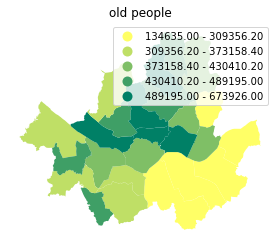

In [8]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

plt.figure(figsize = (50, 50))
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="고령인구", cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)

ax.set_title("old people")
ax.set_axis_off()
plt.show()

## 각 구별 응급실 이용자 시각화

In [14]:
# 각 구별 응급실 이용자 명수 데이터
path = "C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 응급실 이용자 현황(구별) 통계.txt"
emergency = pd.read_csv(path, delimiter = '\t')
emergency.head()

,기간,구분,성별,계,1세미만,1~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80세이상,연령미상
0,2019,합계,계,"1,445,638","31,675","199,706","89,343","175,250","159,664","147,609","187,460","183,575","161,978","109,374",4
1,2019,합계,남자,"719,754","17,832","113,290","49,368","71,729","72,428","73,414","92,422","94,992","87,803","46,473",3
2,2019,합계,여자,"725,884","13,843","86,416","39,975","103,521","87,236","74,195","95,038","88,583","74,175","62,901",1
3,2019,종로구,계,"20,506",304,"2,466","1,163","2,875","2,199","2,019","2,750","2,353","2,466","1,911",-
4,2019,종로구,남자,"10,202",169,"1,369",561,"1,213",987,"1,075","1,455","1,271","1,268",834,-


In [15]:
# 응급환자수의 데이터에서 필요없는 칼럼 제거
emergency = emergency[emergency["성별"] == "계"]
emergency.drop(["기간", "성별", "1세미만","1~9세","10~19세", "20~29세", "30~39세", "40~49세", 
               "50~59세", "60~69세", "70~79세", "80세이상", "연령미상"],axis = 1, inplace = True )

emergency.drop([0,78,81] , axis = 0, inplace = True)
emergency.head()

,구분,계
3,종로구,"20,506"
6,중구,"21,171"
9,용산구,"32,835"
12,성동구,"40,352"
15,광진구,"42,667"


In [16]:
# 응급환자수 데이터를 적절한 데이프레임으로 변경
emergency.reset_index(inplace = True)
emergency.drop("index", axis = 1, inplace = True)
emergency.head()

,구분,계
0,종로구,"20,506"
1,중구,"21,171"
2,용산구,"32,835"
3,성동구,"40,352"
4,광진구,"42,667"


In [17]:
# 응급환자수 데이터의 칼럼이름 변경
emergency.rename(columns = {"계" : "응급환자수"}, inplace = True)
emergency.head()

,구분,응급환자수
0,종로구,"20,506"
1,중구,"21,171"
2,용산구,"32,835"
3,성동구,"40,352"
4,광진구,"42,667"


In [18]:
# 각 인구수에 포함된 , 를 제거한다
emergency["응급환자수"] = emergency["응급환자수"].map(lambda x : x.replace(",", ""))

# 숫자로 바꾼다
emergency["응급환자수"] = emergency["응급환자수"].map(lambda x : float(x))
emergency.head()

,구분,응급환자수
0,종로구,20506.0
1,중구,21171.0
2,용산구,32835.0
3,성동구,40352.0
4,광진구,42667.0


In [19]:
for gu in range(25):
    for j in range(25):
        if emergency.loc[gu,"구분"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "응급환자수"] = emergency.loc[gu,"응급환자수"] 
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0


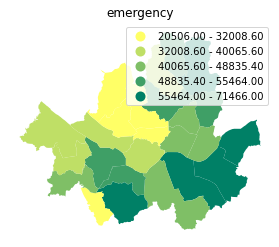

In [20]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="응급환자수", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("emergency")
ax.set_axis_off()
plt.show()

## 각 구별 장애인 시각화

In [21]:
# 각 구별 장애인 데이터
path = "C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 장애인수 (구별).txt"
disabled = pd.read_csv(path, delimiter = '\t', encoding = 'cp949')
disabled.head()

,시군구별(1),시군구별(2),2018
0,시군구별(1),시군구별(2),합계
1,시군구별(1),시군구별(2),계
2,서울특별시,소계,392920
3,서울특별시,종로구,6017
4,서울특별시,중구,5638


In [22]:
# 적합한 dataframe으로 변환
disabled.drop([0,1,2], axis = 0, inplace = True)
disabled.drop(["시군구별(1)"], axis = 1, inplace = True)
disabled.reset_index(inplace = True)
disabled.drop("index", axis = 1, inplace = True)
disabled.rename(columns = {"2018" : "장애인수", "시군구별(2)" : "행정구역"}, inplace = True)
disabled.head()

,행정구역,장애인수
0,종로구,6017
1,중구,5638
2,용산구,8102
3,성동구,11880
4,광진구,12610


In [23]:
disabled.dtypes

행정구역    object
장애인수    object
dtype: object

In [24]:
# 각 인구수에 포함된 , 를 제거한다
disabled["장애인수"] = disabled["장애인수"].map(lambda x : x.replace(",", ""))

# 숫자로 바꾼다
disabled["장애인수"] = disabled["장애인수"].map(lambda x : float(x))
disabled.head()

,행정구역,장애인수
0,종로구,6017.0
1,중구,5638.0
2,용산구,8102.0
3,성동구,11880.0
4,광진구,12610.0


In [25]:
for gu in range(25):
    for j in range(25):
        if disabled.loc[gu,"행정구역"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "장애인수"] = disabled.loc[gu,"장애인수"] 
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0


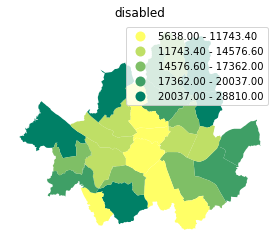

In [26]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="장애인수", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("disabled")
ax.set_axis_off()
plt.show()

## 각 구별 기초생활수급자 시각화

In [27]:
path = "C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 국민기초생활보장 수급자 (구별) 통계.txt"
earn = pd.read_csv(path, delimiter = '\t')
earn.head()

,기간,자치구,총 수급자,총 수급자.1,총 수급자.2,총 수급자.3,총 수급자.4,일반수급자,일반수급자.1,일반수급자.2,...,조건부수급자.2,조건부수급자.3,특례수급자,특례수급자.1,특례수급자.2,특례수급자.3,시설수급자,시설수급자.1,시설수급자.2,시설수급자.3
0,기간,자치구,가구,시설,인원,인원,인원,가구,인원,인원,...,인원,인원,가구,인원,인원,인원,시설,인원,인원,인원
1,기간,자치구,가구,시설,계,남성,여성,가구,계,남성,...,남성,여성,가구,계,남성,여성,시설,계,남성,여성
2,2020,합계,"260,795",598,"370,226","171,615","198,611","220,330","292,744","134,518",...,"28,846","29,635","6,254","8,019","3,640","4,379",598,"10,982","4,611","6,371"
3,2020,본청,-,5,708,156,552,-,-,-,...,-,-,-,-,-,-,5,708,156,552
4,2020,종로구,"3,851",13,"5,232","2,941","2,291","3,280","3,883","2,269",...,324,198,199,218,129,89,13,609,219,390


In [28]:
# 데이터 프레임을 적절하게 변경
earn.drop([0,1], axis = 0, inplace = True)
earn = earn[["자치구", "총 수급자.2"]]
earn.head()

,자치구,총 수급자.2
2,합계,"370,226"
3,본청,708
4,종로구,"5,232"
5,중구,"5,299"
6,용산구,"8,265"


In [29]:
earn.rename(columns = {"총 수급자.2" : "기초생활수급자"}, inplace = True)
earn.head()

,자치구,기초생활수급자
2,합계,"370,226"
3,본청,708
4,종로구,"5,232"
5,중구,"5,299"
6,용산구,"8,265"


In [30]:
earn.drop(2, axis = 0, inplace = True)
earn.reset_index(inplace = True)
earn.drop("index", axis = 1, inplace = True)
earn.drop(0, axis = 0, inplace = True)
earn.head()

,자치구,기초생활수급자
1,종로구,"5,232"
2,중구,"5,299"
3,용산구,"8,265"
4,성동구,"9,718"
5,광진구,"11,864"


In [31]:
earn.reset_index(inplace = True)
earn.drop("index", axis =1 , inplace = True)
earn.head()

,자치구,기초생활수급자
0,종로구,"5,232"
1,중구,"5,299"
2,용산구,"8,265"
3,성동구,"9,718"
4,광진구,"11,864"


In [32]:
# 각 인구수에 포함된 , 를 제거한다
earn["기초생활수급자"] = earn["기초생활수급자"].map(lambda x : x.replace(",", ""))

# 숫자로 바꾼다
earn["기초생활수급자"] = earn["기초생활수급자"].map(lambda x : float(x))
earn.reset_index(inplace = True)
earn.drop("index", axis =1 , inplace = True)
earn.head()

,자치구,기초생활수급자
0,종로구,5232.0
1,중구,5299.0
2,용산구,8265.0
3,성동구,9718.0
4,광진구,11864.0


In [33]:
for gu in range(25):
    for j in range(25):
        if earn.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "기초생활수급자"] = earn.loc[gu,"기초생활수급자"] 
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수,기초생활수급자
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0,14698.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0,16081.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0,14660.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0,6791.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0,20517.0


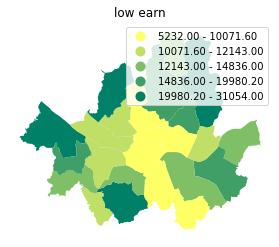

In [34]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="기초생활수급자", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("low earn")
ax.set_axis_off()
plt.show()

## 각 구별 전력 이용량 시각화

In [37]:
path = "C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 전력 사용량 (용도별) 통계.txt"
elec= pd.read_csv(path, delimiter = '\t')
elec.head()

,기간,자치구,합계,가정용,공공용,서비스업,서비스업.1,서비스업.2,서비스업.3,서비스업.4,산업용,산업용.1,산업용.2,산업용.3
0,기간,자치구,합계,가정용,공공용,소계,전철,수도,사업자용,순수서비스,소계,농림어업,광업,제조업
1,2019,합계,"47,167,206","13,499,067","3,697,300","28,340,647","1,528,759","667,943","102,226","26,041,719","1,630,192","15,194","2,067","1,612,931"
2,2019,종로구,"1,746,554","252,182","193,563","1,228,262",-,"2,666","2,343","1,223,254","72,547",70,558,"71,919"
3,2019,중구,"2,460,734","198,995","109,022","1,933,143",-,275,"11,429","1,921,439","219,574",31,164,"219,379"
4,2019,용산구,"1,401,975","396,300","296,811","689,707","6,388","6,096",835,"676,388","19,157",40,-,"19,117"


In [38]:
elec = elec[["자치구", "합계"]]
elec.drop([0,1], axis = 0, inplace = True)
elec.reset_index(inplace = True)
elec.drop("index", axis = 1, inplace = True)
elec.head()

,자치구,합계
0,종로구,"1,746,554"
1,중구,"2,460,734"
2,용산구,"1,401,975"
3,성동구,"2,177,900"
4,광진구,"1,633,402"


In [39]:
# 각 인구수에 포함된 , 를 제거한다
elec["합계"] = elec["합계"].map(lambda x : x.replace(",", ""))

# 숫자로 바꾼다
elec["합계"] = elec["합계"].map(lambda x : float(x))
elec.reset_index(inplace = True)
elec.drop("index", axis =1 , inplace = True)
elec.head()

,자치구,합계
0,종로구,1746554.0
1,중구,2460734.0
2,용산구,1401975.0
3,성동구,2177900.0
4,광진구,1633402.0


In [40]:
for gu in range(25):
    for j in range(25):
        if elec.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "전력사용량"] = elec.loc[gu,"합계"] 
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수,기초생활수급자,전력사용량
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0,14698.0,1520384.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0,16081.0,2837244.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0,14660.0,4586659.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0,6791.0,3279210.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0,20517.0,1710701.0


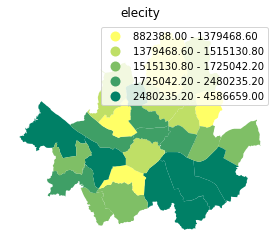

In [41]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="전력사용량", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles', legend = True)
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("elecity")
ax.set_axis_off()
plt.show()

## 각 구별 흡연구역 시각화

In [42]:
smoke = pd.read_excel("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 구별 흡연율.xlsx",
                   sheet_name = 'Sheet2')
smoke.head()

,자치구,흡연구역수
0,강남구,29561
1,서초구,16357
2,송파구,14411
3,마포구,13964
4,영등포구,13712


In [43]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   흡연구역수   25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [44]:
for gu in range(25):
    for j in range(25):
        if smoke.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "흡연구역수"] = smoke.loc[gu, "흡연구역수"] 
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0,14698.0,1520384.0,10439.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0,16081.0,2837244.0,14411.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0,14660.0,4586659.0,29561.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0,6791.0,3279210.0,16357.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0,20517.0,1710701.0,9545.0


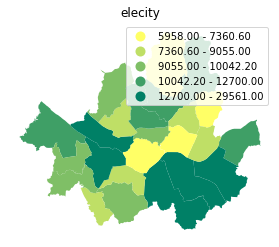

In [45]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="흡연구역수", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles', legend = True)
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("elecity")
ax.set_axis_off()
plt.show()

## 각 구별 노후 주택현황 시각화

In [46]:
path = "C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 노후기간별 주택현황 통계.txt"
house= pd.read_csv(path, delimiter = '\t')
house.head()

,기간,자치구,20년~30년미만,20년~30년미만.1,20년~30년미만.2,20년~30년미만.3,20년~30년미만.4,20년~30년미만.5,30년 이상,30년 이상.1,30년 이상.2,30년 이상.3,30년 이상.4,30년 이상.5
0,기간,자치구,계,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택,계,단독주택,아파트,연립주택,다세대주택,비거주용 건물내 주택
1,2019,서울시,"791,237","123,743","455,777","50,961","150,483","10,273","551,001","157,280","290,335","37,808","53,508","12,070"
2,2019,종로구,"13,449","2,555","3,596","2,357","4,653",288,"12,507","8,451","1,213","1,731",696,416
3,2019,중구,"7,847","1,571","3,344","1,028","1,651",253,"7,119","3,953","1,860",325,562,419
4,2019,용산구,"15,927","4,159","5,868","1,675","4,051",174,"21,541","9,339","8,421",795,"2,543",443


In [47]:
house = house[["자치구", "20년~30년미만","30년 이상"]]
house.drop([0,1], axis = 0, inplace = True)
house.reset_index(inplace = True)
house.drop("index", axis = 1, inplace = True)
house.head()

,자치구,20년~30년미만,30년 이상
0,종로구,"13,449","12,507"
1,중구,"7,847","7,119"
2,용산구,"15,927","21,541"
3,성동구,"22,786","13,377"
4,광진구,"27,708","14,134"


In [48]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   자치구        25 non-null     object
 1   20년~30년미만  25 non-null     object
 2   30년 이상     25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [49]:
# 각 인구수에 포함된 , 를 제거한다
house["20년~30년미만"] = house["20년~30년미만"].map(lambda x : x.replace(",", ""))
house["30년 이상"] = house["30년 이상"].map(lambda x : x.replace(",", ""))

# 숫자로 바꾼다
house["20년~30년미만"] = house["20년~30년미만"].map(lambda x : float(x))
house["30년 이상"] = house["30년 이상"].map(lambda x : float(x))
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   자치구        25 non-null     object 
 1   20년~30년미만  25 non-null     float64
 2   30년 이상     25 non-null     float64
dtypes: float64(2), object(1)
memory usage: 728.0+ bytes


In [50]:
for gu in range(25):
    for j in range(25):
        if house.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "20~30년된 집 수"] = house.loc[gu, "20년~30년미만"] 
for gu in range(25):
    for j in range(25):
        if house.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "30년 이상 집 수"] = house.loc[gu, "30년 이상"]
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년된 집 수,30년 이상 집 수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0,14698.0,1520384.0,10439.0,19708.0,20878.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0,16081.0,2837244.0,14411.0,35284.0,43334.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0,14660.0,4586659.0,29561.0,40242.0,40192.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0,6791.0,3279210.0,16357.0,21420.0,29391.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0,20517.0,1710701.0,9545.0,37779.0,16167.0


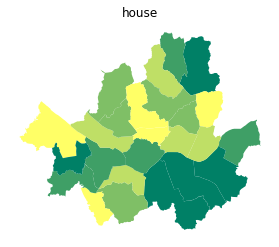

In [51]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="30년 이상 집 수", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles')
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("house")
ax.set_axis_off()
plt.show()

## 각 구별 재개발 현황 시각화

In [52]:
rebuilt = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 재개발 재건축 정비사업 현황.csv", encoding = "euc-kr")
rebuilt.head()

,사업번호,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,정비구역명칭,...,건폐율,용적률,높이(m),지상층수,지하층수,건설세대총수,60미만건설세대수,60이상85이하건설세대수,85초과건설세대수,건축계획비고
0,11650-900000789,서초구,NaN,재건축,공공지원자,강남원효성빌라 주택재건축정비사업 조합설립추진위원회,반포동 591-1,정비구역지정,운영,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11260-900000170,중랑구,NaN,재개발(주택정비형),공공지원자,중화2재정비촉진구역 주택재개발정비사업,중화동 329-38,정비구역지정,일시중단,중화2재정비촉진구역 주택재개발정비사업,...,30.0,295.3,125.0,34.0,2.0,2317.0,985.0,680.0,652.0,부분임대326
2,11380-100001067,은평구,NaN,재개발(도시정비형),공공지원자,수색11재정비촉진구역,수색동 32-13,정비구역지정,일시중단,수색11재정비촉진구역,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11305-900000788,강북구,NaN,재개발(주택정비형),조합,번동 4구역 가로주택 정비사업 조합,번동 428-4,조합설립인가,운영,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11110-100003003,종로구,NaN,재개발(도시정비형),공공지원자,돈의문2구역 도시환경정비사업 조합설립추진위원회,교남동 28,정비구역지정,일시중단,돈의문 2구역 도시환경정비구역,...,60.0,710.0,90.0,25.0,NaN,NaN,NaN,NaN,NaN,판매및업무


In [53]:
rebuilt = rebuilt[["자치구"]]
rebuilt.head()

,자치구
0,서초구
1,중랑구
2,은평구
3,강북구
4,종로구


In [54]:
dict1 = {}
for i in rebuilt["자치구"]:
    if i in dict1.keys():
        dict1[i] += 1
    else:
        dict1[i] = 1
dict1

{'서초구': 59,
 '중랑구': 15,
 '은평구': 33,
 '강북구': 20,
 '종로구': 11,
 '영등포구': 70,
 '강남구': 37,
 '노원구': 14,
 '금천구': 22,
 '중구': 9,
 '강동구': 28,
 '양천구': 20,
 '마포구': 20,
 '강서구': 20,
 '용산구': 30,
 '동작구': 23,
 '동대문구': 39,
 '성북구': 44,
 '광진구': 10,
 '관악구': 17,
 '구로구': 13,
 '송파구': 28,
 '성동구': 27,
 '서대문구': 30,
 '도봉구': 4}

In [56]:
rebuilt = pd.DataFrame(list(dict1.items()),columns = ["자치구", "재개발 개수"] )
rebuilt.head()

,자치구,재개발 개수
0,서초구,59
1,중랑구,15
2,은평구,33
3,강북구,20
4,종로구,11


In [57]:
for gu in range(25):
    for j in range(25):
        if rebuilt.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "재개발 개수"] = rebuilt.loc[gu, "재개발 개수"] 
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년된 집 수,30년 이상 집 수,재개발 개수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0,14698.0,1520384.0,10439.0,19708.0,20878.0,28.0
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0,16081.0,2837244.0,14411.0,35284.0,43334.0,28.0
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0,14660.0,4586659.0,29561.0,40242.0,40192.0,37.0
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0,6791.0,3279210.0,16357.0,21420.0,29391.0,59.0
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0,20517.0,1710701.0,9545.0,37779.0,16167.0,17.0


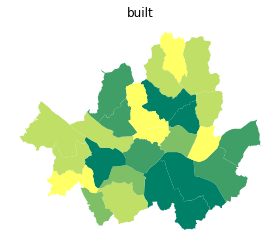

In [58]:
fig, ax = plt.subplots(1,1)
ax = seoul_area.plot(ax = ax, column="재개발 개수", figsize=(30,30), cmap = 'summer_r', scheme = 'quantiles')
# safe_center.plot(ax = ax, marker = 'o', color = 'black', label = "center")
ax.set_title("built")
ax.set_axis_off()
plt.show()

## 각 구별 불법 주정차 시각화

In [67]:
parking = pd.read_excel("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/서울시 구별 불법 주정차.xlsx",
                   sheet_name = 'Sheet1')
parking.head()

,자치구,2016,2017,2018,2019,2020,5년 평균 주정차수
0,강남,461099,410681,296820,65339,176273,282042.4
1,강동,105298,105987,93692,164079,70150,107841.2
2,강북,48897,61815,50378,97027,52034,62030.2
3,강서,98465,105974,148538,55876,170141,115798.8
4,관악,118619,106327,108822,61448,84144,95872.0


In [68]:
for index, name in enumerate(parking["자치구"]):
    if name != "중구":
        parking["자치구"][index] = name + "구"
    else:
        parking["자치구"][index] = name
parking

,자치구,2016,2017,2018,2019,2020,5년 평균 주정차수
0,강남구,461099,410681,296820,65339,176273,282042.4
1,강동구,105298,105987,93692,164079,70150,107841.2
2,강북구,48897,61815,50378,97027,52034,62030.2
3,강서구,98465,105974,148538,55876,170141,115798.8
4,관악구,118619,106327,108822,61448,84144,95872.0
5,광진구,67494,69844,65839,108397,60043,74323.4
6,구로구,90433,106143,99637,59388,76618,86443.8
7,금천구,66446,56800,55896,59805,53328,58455.0
8,노원구,80335,81793,82001,116091,61993,84442.6
9,도봉구,60171,57403,60759,175000,42378,79142.2


In [69]:
for gu in range(25):
    for j in range(25):
        if parking.loc[gu,"자치구"] == seoul_area.loc[j,"SGG_NM"]:
            seoul_area.loc[j, "5년 평균 불법주정차수"] = parking.loc[gu, "5년 평균 주정차수"] 
seoul_area

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry,고령인구,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년된 집 수,30년 이상 집 수,재개발 개수,5년 평균 불법주정차수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996.0,61704.0,17380.0,14698.0,1520384.0,10439.0,19708.0,20878.0,28.0,107841.2
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635.0,63639.0,20008.0,16081.0,2837244.0,14411.0,35284.0,43334.0,28.0,157846.2
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645.0,64784.0,15327.0,14660.0,4586659.0,29561.0,40242.0,40192.0,37.0,282042.4
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505.0,48749.0,10581.0,6791.0,3279210.0,16357.0,21420.0,29391.0,59.0,192251.6
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109.0,67253.0,20264.0,20517.0,1710701.0,9545.0,37779.0,16167.0,17.0,95872.0
5,11590,동작구,689,11590,132,"POLYGON ((947237.833 1943029.684, 947245.149 1...",357014.0,53904.0,14691.0,12408.0,1289443.0,8372.0,35119.0,14869.0,23.0,77479.8
6,11560,영등포구,481,11560,133,"POLYGON ((945060.841 1950575.575, 945060.701 1...",399562.0,51135.0,14405.0,10963.0,2652173.0,13712.0,26106.0,27330.0,70.0,131964.4
7,11545,금천구,33,11545,134,"POLYGON ((944458.844 1943077.341, 944482.865 1...",447056.0,25336.0,11197.0,11637.0,1613000.0,7375.0,14582.0,12166.0,22.0,58455.0
8,11530,구로구,33,11530,135,"POLYGON ((939273.809 1944348.583, 939285.784 1...",311569.0,40600.0,17603.0,12329.0,1895191.0,10023.0,34711.0,23250.0,13.0,86443.8
9,11500,강서구,65,11500,136,"MULTIPOLYGON (((935035.249 1950923.294, 935041...",327361.0,35559.0,28810.0,27797.0,2558240.0,12447.0,70036.0,10898.0,20.0,115798.8


## 각 구별 모든 data 지도 시각화 

In [70]:
seoul = seoul_area.copy()

In [74]:
total_data = pd.read_csv("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/통합데이터2.csv", encoding = 'euc-kr')
total_data.head()

,자치구,고령인구수,화재건수,응급환자수,장애인수,기초생활수급자,전력사용량,흡연구역수,20~30년,30년 이상 집 수,...,재산피해(천원),새벽속도,오전속도,오후속도,저녁속도,새벽교통량,오전교통량,오후교통량,저녁교통량,5년 평균 주정차수
0,강동구,158996,254,61704,17380,14698,1520384,10439,19708,20878,...,533359,31.279554,26.667261,23.867096,24.550370,355180,2136754,2465291,1628408,107841.2
1,송파구,134635,335,63639,20008,16081,2837244,14411,35284,43334,...,958829,31.923905,27.654362,24.658916,25.022997,700548,3727348,4256523,2938998,157846.2
2,강남구,244645,456,64784,15327,14660,4586659,29561,40242,40192,...,1677681,35.468995,30.668044,24.663747,25.740442,1265247,5888586,6928078,4899306,282042.4
3,서초구,300505,242,48749,10581,6791,3279210,16357,21420,29391,...,970247,38.610969,32.700713,26.538161,28.430046,1432953,7090505,7822175,5716302,192251.6
4,관악구,360109,311,67253,20264,20517,1710701,9545,37779,16167,...,654586,35.304238,31.232585,27.170388,27.591352,245047,850977,1011971,768085,95872.0


In [75]:
seoul.rename(columns = {"SGG_NM" : "area"}, inplace = True)
total_data.rename(columns = {"자치구" : "area"}, inplace = True)

In [76]:
seoul = pd.merge(seoul.iloc[:, :6], total_data, on= "area", how = 'left')
seoul.head()

,ADM_SECT_C,area,SGG_OID,COL_ADM_SE,GID,geometry,고령인구수,화재건수,응급환자수,장애인수,...,재산피해(천원),새벽속도,오전속도,오후속도,저녁속도,새벽교통량,오전교통량,오후교통량,저녁교통량,5년 평균 주정차수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996,254,61704,17380,...,533359,31.279554,26.667261,23.867096,24.550370,355180,2136754,2465291,1628408,107841.2
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635,335,63639,20008,...,958829,31.923905,27.654362,24.658916,25.022997,700548,3727348,4256523,2938998,157846.2
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645,456,64784,15327,...,1677681,35.468995,30.668044,24.663747,25.740442,1265247,5888586,6928078,4899306,282042.4
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505,242,48749,10581,...,970247,38.610969,32.700713,26.538161,28.430046,1432953,7090505,7822175,5716302,192251.6
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109,311,67253,20264,...,654586,35.304238,31.232585,27.170388,27.591352,245047,850977,1011971,768085,95872.0


In [77]:
seoul.drop(['주거지역', '상업지역', '공업지역', '녹지지역'], axis = 1, inplace = True)
seoul.head()

,ADM_SECT_C,area,SGG_OID,COL_ADM_SE,GID,geometry,고령인구수,화재건수,응급환자수,장애인수,...,재산피해(천원),새벽속도,오전속도,오후속도,저녁속도,새벽교통량,오전교통량,오후교통량,저녁교통량,5년 평균 주정차수
0,11740,강동구,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1...",158996,254,61704,17380,...,533359,31.279554,26.667261,23.867096,24.550370,355180,2136754,2465291,1628408,107841.2
1,11710,송파구,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1...",134635,335,63639,20008,...,958829,31.923905,27.654362,24.658916,25.022997,700548,3727348,4256523,2938998,157846.2
2,11680,강남구,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1...",244645,456,64784,15327,...,1677681,35.468995,30.668044,24.663747,25.740442,1265247,5888586,6928078,4899306,282042.4
3,11650,서초구,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1...",300505,242,48749,10581,...,970247,38.610969,32.700713,26.538161,28.430046,1432953,7090505,7822175,5716302,192251.6
4,11620,관악구,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1...",360109,311,67253,20264,...,654586,35.304238,31.232585,27.170388,27.591352,245047,850977,1011971,768085,95872.0


In [78]:
col_name = seoul.columns[6:]
col_name

Index(['고령인구수', '화재건수', '응급환자수', '장애인수', '기초생활수급자', '전력사용량', '흡연구역수', '20~30년',
       '30년 이상 집 수', '재개발수', '119안전센터 1개소당 담당인구', '재산피해(천원)', '새벽속도', '오전속도',
       '오후속도', '저녁속도', '새벽교통량', '오전교통량', '오후교통량', '저녁교통량', '5년 평균 주정차수'],
      dtype='object')

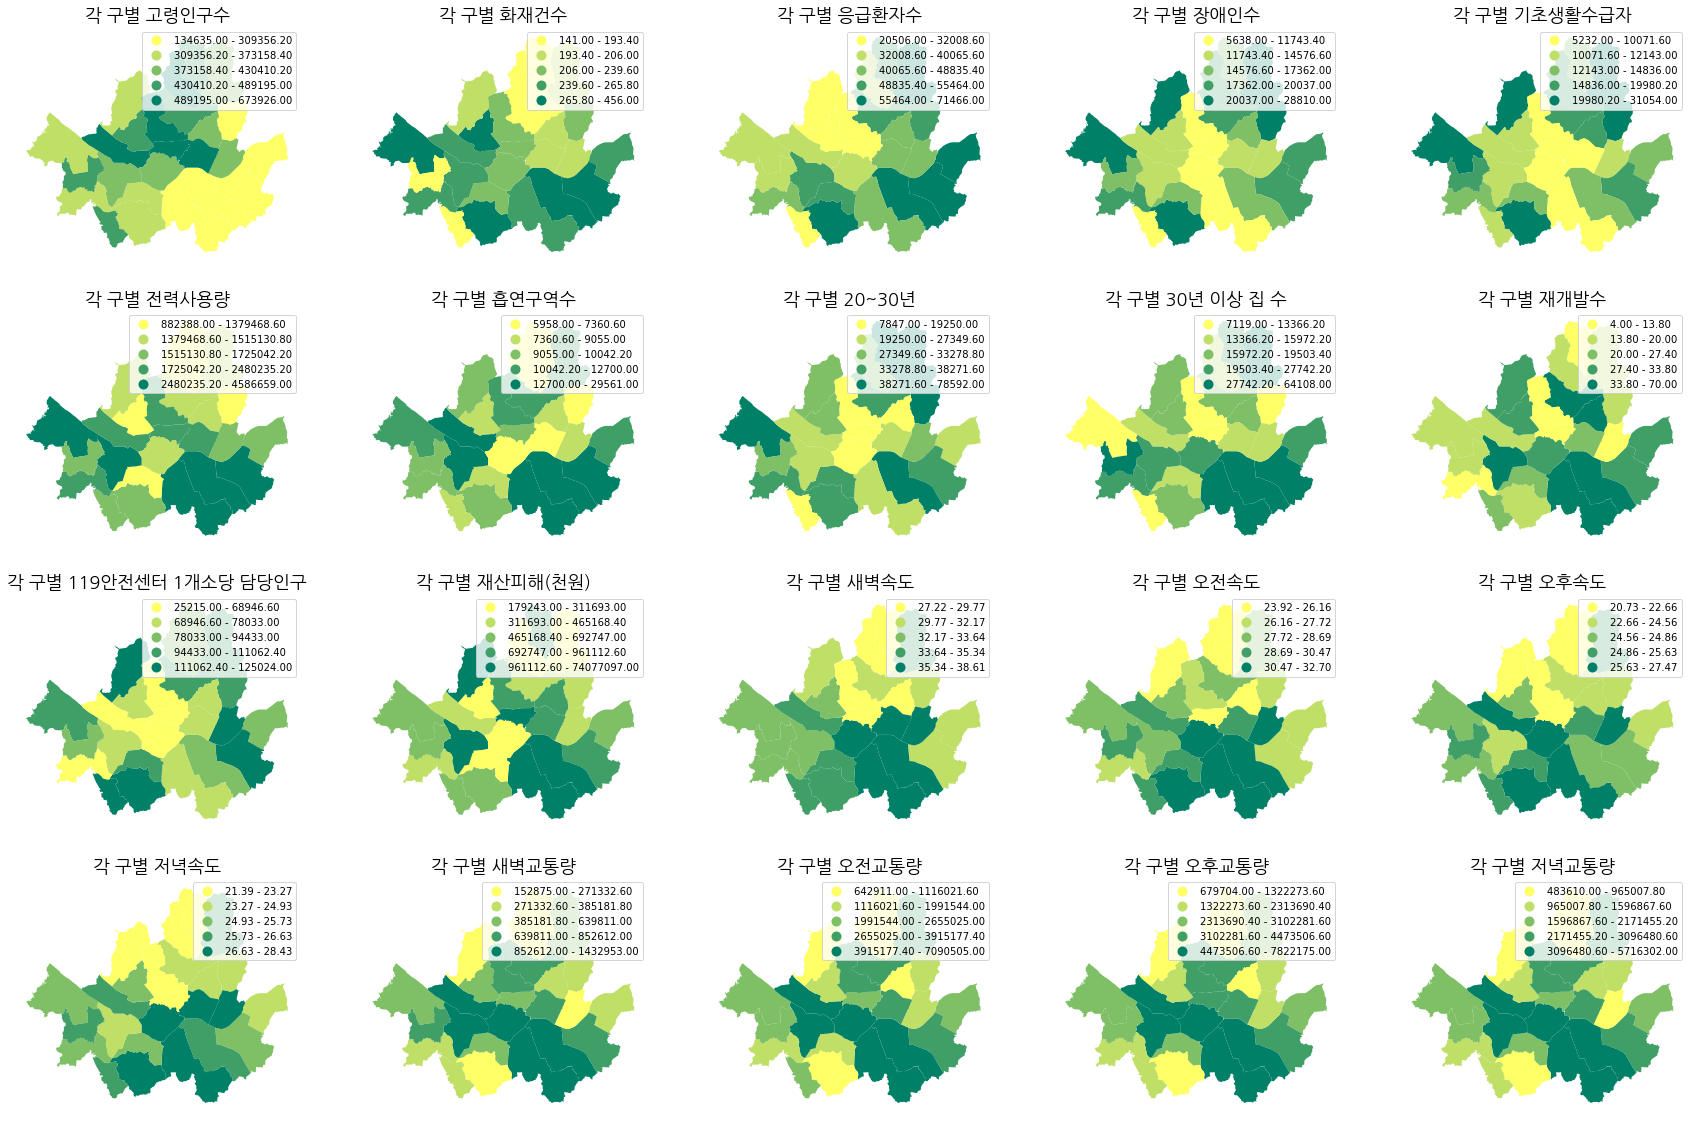

In [89]:
fig = plt.figure(figsize = (30, 20))

for name, i in zip(col_name, range(20)):
    ax = fig.add_subplot(4,5,i+1)
    ax = seoul.plot(ax = ax, column= name , cmap = 'summer_r', scheme = 'quantiles', k = 5, legend = True)
    ax.set_title("각 구별 "+name , fontproperties=fontprop)
    ax.set_axis_off()

plt.show()
# 고령인구 = [309356.2, 373158.4, 430310.2, 489195, 673926.00]
# 화재건수 = [193.4, 206, 239.6, 265]
# 응급환자 = [32008.6, 40065.6, 48835.4, 55464, 71466]
# 장애인수 = [11743, 14576, 17362, 20037, 28810]
# 기초생활수급자 = [10071.6, 12143, 14836, 19980.2, 31054]
# 전력사용량 = [1379468.6, 1515130.8, 1725042.2, 2480235.2, 4586659]
# 흡연구역수 = [7360.6, 9055, 10042.2, 12700, 29561]
# 20년 집 = [19250, 27349.6, 33278.8, 38271.6, 78592]
# 30년 집 = [13366.2, 15972.2, 19503.4, 27742.2, 64108]
# 재개발 = [13.8, 20, 27.4, 33.8, 70]
# 불법주정차 = [74278.52, 85643.32, 111024.24, 142061.8, 282042.4]

# 각 data간의 correlation 확인

In [90]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

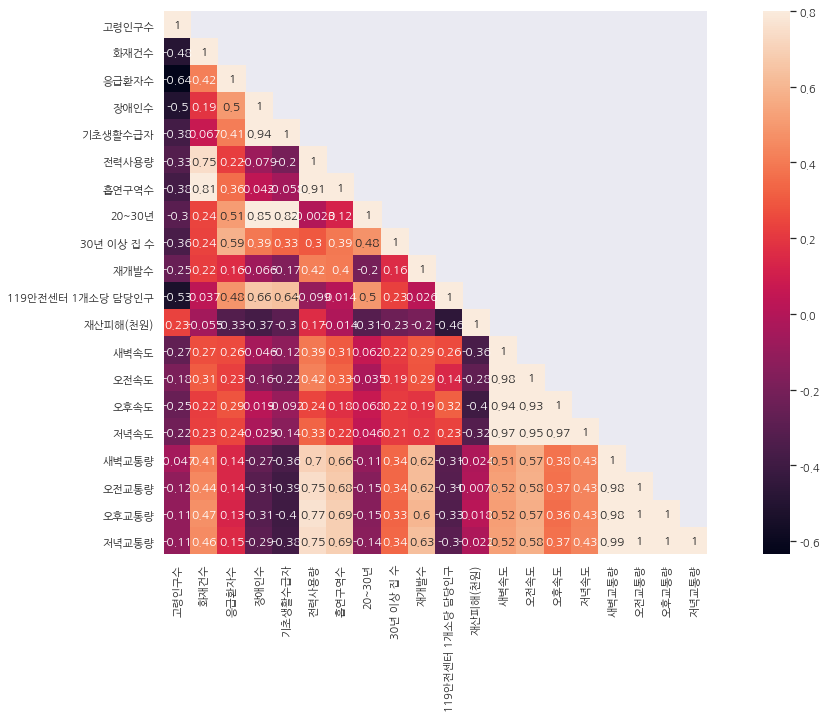

In [91]:
corrMatt = seoul[['고령인구수', '화재건수', '응급환자수', '장애인수', '기초생활수급자', '전력사용량', '흡연구역수', '20~30년',
       '30년 이상 집 수', '재개발수', '119안전센터 1개소당 담당인구', '재산피해(천원)', '새벽속도', '오전속도',
       '오후속도', '저녁속도', '새벽교통량', '오전교통량', '오후교통량', '저녁교통량']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

## 각 구별 클러스터 확인

In [92]:
new_col = pd.read_excel("C:/Users/Leegihong/OneDrive - 숭실대학교 - Soongsil University/2021-1/전종설/데이터/클러스터데이터.xlsx",
                   sheet_name = 'Sheet1')
new_col.head()

,자치구,a,b,c,cluster
0,강동구,-0.287448,0.682209,-0.262561,2
1,송파구,0.527453,1.250360,1.836559,0
2,강남구,3.347294,0.040428,5.253430,3
3,서초구,2.808390,-1.552893,2.851665,3
4,관악구,-1.535195,1.005059,-0.656103,2


In [93]:
dict1 = {}
for k in range(4):
    dict1[k] = new_col[new_col["cluster"]==k]["자치구"].values
dict1

{0: array(['송파구', '강서구', '노원구'], dtype=object),
 1: array(['마포구', '용산구', '중구', '종로구'], dtype=object),
 2: array(['강동구', '관악구', '동작구', '금천구', '구로구', '서대문구', '은평구', '도봉구', '강북구',
        '성북구', '중랑구', '동대문구', '광진구', '성동구', '양천구'], dtype=object),
 3: array(['강남구', '서초구', '영등포구'], dtype=object)}

## 각 데이터별로 5 level로 나누어서 csv 파일 생성

In [ ]:
# 고령인구 = [309356.2, 373158.4, 430310.2, 489195, 673926.00]
# 응급환자 = [32008.6, 40065.6, 48835.4, 55464, 71466]
# 장애인수 = [11743, 14576, 17362, 20037, 28810]
# 기초생활수급자 = [10071.6, 12143, 14836, 19980.2, 31054]
# 전력사용량 = [1379468.6, 1515130.8, 1725042.2, 2480235.2, 4586659]
# 흡연구역수 = [7360.6, 9055, 10042.2, 12700, 29561]
# 20년 집 = [19250, 27349.6, 33278.8, 38271.6, 78592]
# 30년 집 = [13366.2, 15972.2, 19503.4, 27742.2, 64108]
# 재개발 = [13.8, 20, 27.4, 33.8, 70]
# 불법주정차 = [74278.52, 85643.32, 111024.24, 142061.8, 282042.4]

In [ ]:
benchmark = [[309356.2, 373158.4, 430310.2, 489195],
[32008.6, 40065.6, 48835.4, 55464],
[11743, 14576, 17362, 20037],
[10071.6, 12143, 14836, 19980.2],
[1379468.6, 1515130.8, 1725042.2, 2480235.2],
[7360.6, 9055, 10042.2, 12700],
[19250, 27349.6, 33278.8, 38271.6],
[13366.2, 15972.2, 19503.4, 27742.2],
[13.8, 20, 27.4, 33.8],
[74278.52, 85643.32, 111024.24, 142061.8]]

In [ ]:
col_name = seoul_area.columns[6:]

In [ ]:
for col, mark in zip(col_name, benchmark):
    for i in range(25):
        if seoul_area.loc[i, col] <= mark[0]:
            seoul_area.loc[i, col] = 1
        elif seoul_area.loc[i, col] <= mark[1]:
            seoul_area.loc[i, col] = 2
        elif seoul_area.loc[i, col] <= mark[2]:
            seoul_area.loc[i, col] = 3
        elif seoul_area.loc[i, col] <= mark[3]:
            seoul_area.loc[i, col] = 4
        elif seoul_area.loc[i, col] > mark[3]:
            seoul_area.loc[i, col] = 5

In [ ]:
seoul_area.head()

In [ ]:
fig = plt.figure(figsize = (20, 10))

for name, i in zip(col_name, range(10)):
    ax = fig.add_subplot(2,5,i+1)
    ax = seoul_area.plot(ax = ax, column= name , cmap = 'summer_r', scheme = 'quantiles', k = 5)
    ax.set_title("각 구별 "+name , fontproperties=fontprop)
    ax.set_axis_off()

plt.show()

In [ ]:
outdata=  seoul_area[["SGG_NM", '고령인구', '응급환자수', '장애인수', '기초생활수급자', '전력사용량', '흡연구역수', '20~30년된 집 수',
       '30년 이상 집 수', '재개발 개수', '5년 평균 불법주정차수']]
outdata.to_csv("total_data.csv", encoding= 'euc-kr')

## matplotlib의 한글 표현을 위한 설정

In [80]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [81]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.2.2
설치 위치:  C:\Users\Leegihong\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Leegihong\.matplotlib
캐시 위치:  C:\Users\Leegihong\.matplotlib


In [82]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\Leegihong\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [83]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

731


In [84]:
# OSX 의 설치 된 폰트를 가져오는 함수
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

0


In [85]:
font_list[:10] 

['C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\WINDOWS\\Fonts\\GILLUBCD.TTF',
 'C:\\WINDOWS\\Fonts\\palab.ttf',
 'C:\\Windows\\Fonts\\Code39AzaleaWide2.ttf',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\WINDOWS\\Fonts\\gadugi.ttf',
 'C:\\WINDOWS\\Fonts\\consola.ttf',
 'C:\\WINDOWS\\Fonts\\COOPBL.TTF',
 'C:\\WINDOWS\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\PERTIBD.TTF']

In [86]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트명 만 출력
f[:10]

731


['DejaVu Sans Mono',
 'STIXSizeFourSym',
 'cmtt10',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'cmb10',
 'STIXSizeFourSym',
 'cmss10',
 'STIXSizeOneSym']

In [87]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic',
  'C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic',
  'C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic',
  'C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic',
  'C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicLight.ttf')]

In [88]:
path = "C:\\Users\\Leegihong\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
fontprop = fm.FontProperties(fname=path, size=18)